<a href="https://colab.research.google.com/github/GunH-colab/basicsML/blob/master/Regression/bostonhousing_pricepredict_keras(Sequential).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   **Sequential API**
*   **Boston Housing Dataset**
*   **Standarized using StandardScaler**
*   **Regularized(L2 and Droupout)**
*   **He initialization based on fan(avg)**
*   **Non-saturaing activation -> RReLU(leak = 0.2)**



In [32]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [33]:
# splitting the datasets into train and test sets

(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()

print(train_data.shape,"\n", test_data.shape,"\n", train_targets.shape,"\n", test_targets.shape)

(404, 13) 
 (102, 13) 
 (404,) 
 (102,)


In [34]:
# pre-processing the datasets using StandardScaler

sc = StandardScaler()
sc.fit(train_data)
train_data_std = sc.transform(train_data)
test_data_std = sc.transform(test_data)


In [35]:
he_in_avg = keras.initializers.VarianceScaling(scale=2., mode='fan_avg', distribution='uniform')


In [36]:
#THE MODEL

model = keras.models.Sequential([
        keras.layers.Dense(8, kernel_regularizer=keras.regularizers.l2(0.01), kernel_initializer=he_in_avg, input_shape=[train_data.shape[1]]),
        keras.layers.LeakyReLU(alpha=0.2),
        keras.layers.Dropout(0.008),
        keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.01), kernel_initializer=he_in_avg),
        keras.layers.LeakyReLU(alpha=0.2),
        keras.layers.Dropout(0.008),
        keras.layers.Dense(1, kernel_regularizer=keras.regularizers.l2(0.01), kernel_initializer=he_in_avg),
        ])

In [37]:
# compiling the model

model.compile(optimizer="rmsprop", loss="mse", metrics=['mape'])

In [38]:
# training the model

history = model.fit(train_data, train_targets, validation_split=0.2, epochs=500)

Epoch 1/500
11/11 [==============================] - 0s 13ms/step - loss: 67059.7500 - mape: 1283.9468 - val_loss: 44138.3477 - val_mape: 964.4973
Epoch 2/500
11/11 [==============================] - 0s 5ms/step - loss: 34935.3984 - mape: 939.5939 - val_loss: 23614.2598 - val_mape: 710.8211
Epoch 3/500
11/11 [==============================] - 0s 4ms/step - loss: 18257.6289 - mape: 687.9818 - val_loss: 12096.6562 - val_mape: 515.6790
Epoch 4/500
11/11 [==============================] - 0s 4ms/step - loss: 9400.0693 - mape: 496.5063 - val_loss: 5315.8008 - val_mape: 344.8185
Epoch 5/500
11/11 [==============================] - 0s 5ms/step - loss: 4480.7930 - mape: 337.0746 - val_loss: 2094.4509 - val_mape: 213.4398
Epoch 6/500
11/11 [==============================] - 0s 4ms/step - loss: 2134.6602 - mape: 219.6789 - val_loss: 816.2669 - val_mape: 122.8832
Epoch 7/500
11/11 [==============================] - 0s 4ms/step - loss: 1317.8907 - mape: 163.6256 - val_loss: 432.9698 - val_mape: 80

In [39]:
# model evaluation

model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 32.2521 - mape: 21.3941


[32.25212860107422, 21.394100189208984]

In [40]:
# recording the predictions

preds = model.predict(test_data)

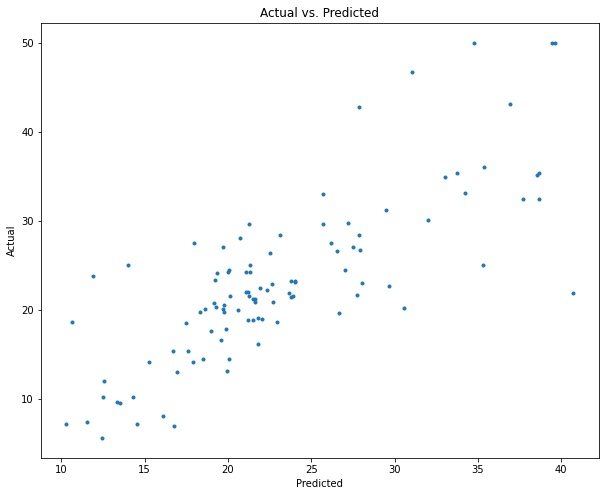

In [41]:
# scatter-plot of Actual vs. Predicted values

plt.figure(figsize=(10, 8))
plt.scatter(preds, test_targets, marker='.')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actual vs. Predicted')
plt.show()

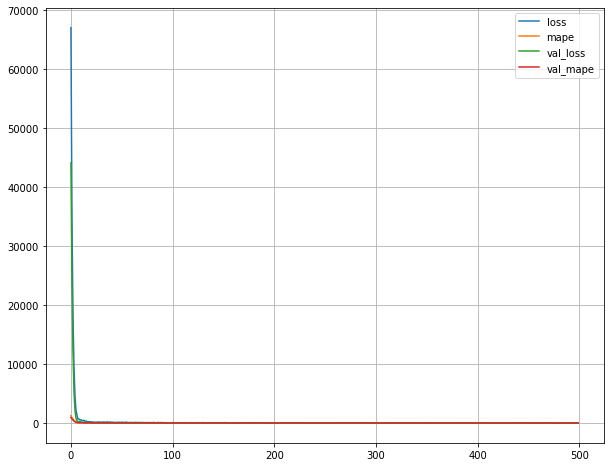

In [42]:
# model graph 

import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.gca()

In [43]:
new_pred = test_data[:10]
new_out = model.predict(new_pred)

In [44]:
print(new_out,"\n\nPredicted Prices\n\n")
print(test_targets[:10],"\n\nActual Prices")


[[10.285428]
 [21.19991 ]
 [22.032017]
 [27.500576]
 [22.351488]
 [20.063007]
 [29.463402]
 [22.664967]
 [19.7621  ]
 [23.773727]] 

Predicted Prices


[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2] 

Actual Prices
